Импорт библиотек

In [1]:
import os
from os import path
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller

3.1 Проверка ряда на стационарность

In [2]:
students = pd.read_csv('data/Radioactivity_in_the_ground_at_10_minute_intervals_over_one_month.csv')
df = students[['rate']]

alpha = 0.05
name = "Оценки"
ts = df['rate']
print(f'Тест Дики-Фуллера ряда "Оценки" :')

dftest = adfuller(ts, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

if dfoutput["p-value"] < alpha:
    print(f"Значение p меньше {alpha * 100}%. Ряд стационарный.")
else:
    print(f"Значение p больше {alpha*100}%. Ряд не стационарный.")

Тест Дики-Фуллера ряда "Оценки" :
Test Statistic                -7.520481e+00
p-value                        3.802510e-11
#Lags Used                     3.000000e+01
Number of Observations Used    4.178000e+03
Critical Value (1%)           -3.431916e+00
Critical Value (5%)           -2.862232e+00
Critical Value (10%)          -2.567138e+00
dtype: float64
Значение p меньше 5.0%. Ряд стационарный.


3.2 Удаление тренда, проверка на стационарность

In [3]:
nottrend = []
for i in range(1, len(df["rate"])):
   nottrend.append(df["rate"][i] - df["rate"][i-1])
ts = nottrend

print(f'Тест Дики-Фуллера ряда "Пасажиры без тренда" :')
dftest = adfuller(ts, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

if dfoutput["p-value"] < alpha:
    print(f"Значение p меньше {alpha * 100}%. Ряд стационарный.")
else:
    print(f"Значение p больше {alpha*100}%. Ряд не стационарный.")

Тест Дики-Фуллера ряда "Пасажиры без тренда" :
Test Statistic                  -19.626873
p-value                           0.000000
#Lags Used                       31.000000
Number of Observations Used    4176.000000
Critical Value (1%)              -3.431917
Critical Value (5%)              -2.862232
Critical Value (10%)             -2.567139
dtype: float64
Значение p меньше 5.0%. Ряд стационарный.


3.3 Удаление сезонности, проверка на стационарность

In [4]:
s = 6
notseason = []
for i in range(s, len(df["rate"])):
   notseason.append(df["rate"][i] - df["rate"][i-s])
ts = notseason

print(f'Тест Дики-Фуллера ряда "Пасажиры без сезонности" :')
dftest = adfuller(ts, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

if dfoutput["p-value"] < alpha:
    print(f"Значение p меньше {alpha * 100}%. Ряд стационарный.")
else:
    print(f"Значение p больше {alpha*100}%. Ряд не стационарный.")

Тест Дики-Фуллера ряда "Пасажиры без сезонности" :
Test Statistic                  -19.800889
p-value                           0.000000
#Lags Used                       29.000000
Number of Observations Used    4173.000000
Critical Value (1%)              -3.431918
Critical Value (5%)              -2.862233
Critical Value (10%)             -2.567139
dtype: float64
Значение p меньше 5.0%. Ряд стационарный.


3.4-3.6 AR модель и корелляции

Стандартное отклонение = 0.4378971473863983
Среднее = 2.101712573153546


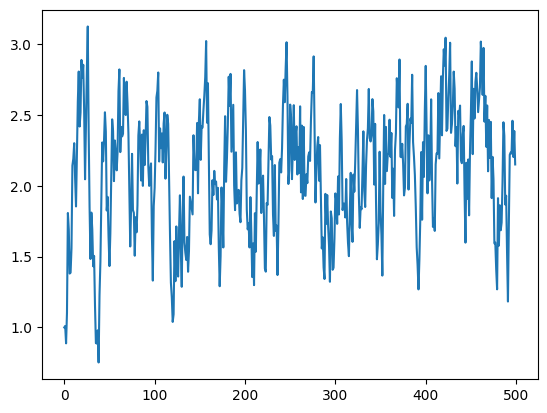

In [5]:
#Исходный случайный ряд

N = 500
ar1 = [1]
for i in range(1, N):
    ar1.append(0.76 * ar1[i-1] + np.random.random())
plt.plot(ar1)
print(f"Стандартное отклонение = {np.std(ar1)}\nСреднее = {np.mean(ar1)}")

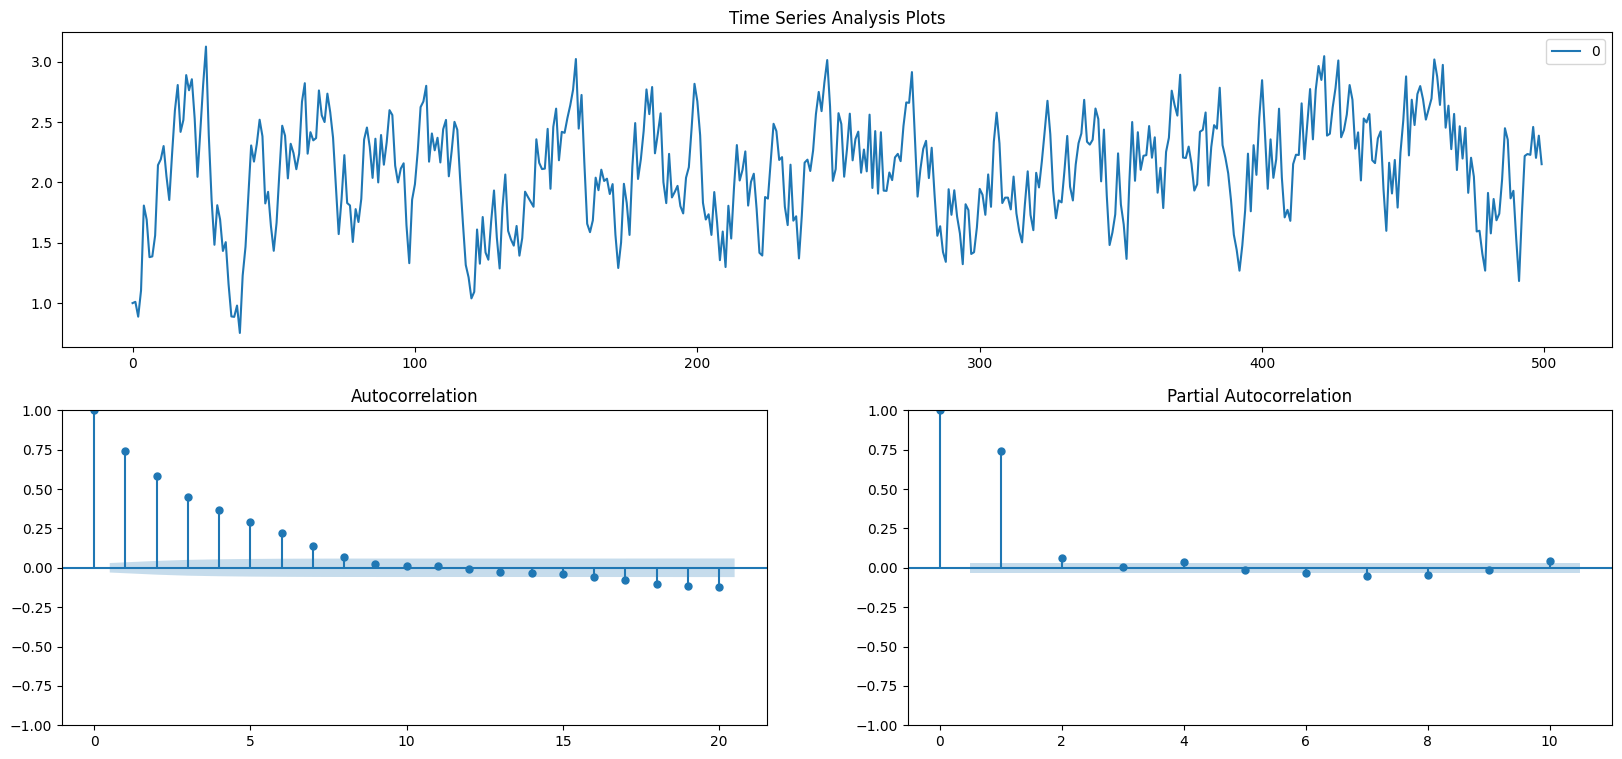

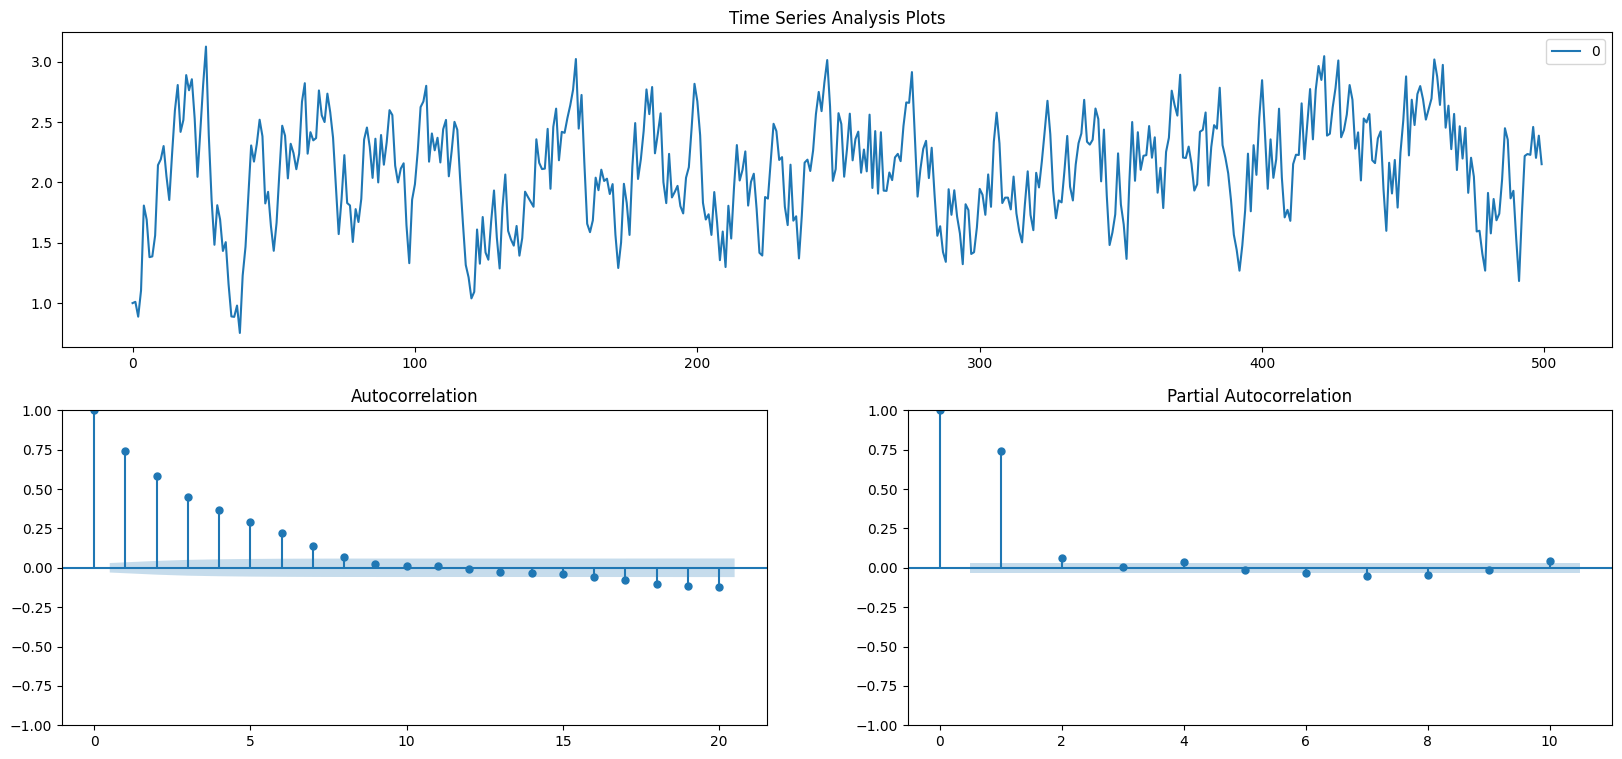

In [6]:
#Обычная и частичная автокорелляция

ts = pd.DataFrame(ar1)

fig = plt.figure(figsize=(20, 9))
layout = (2, 2)
ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
acf_ax = plt.subplot2grid(layout, (1, 0))
pacf_ax = plt.subplot2grid(layout, (1, 1))

ts.plot(ax=ts_ax)
ts_ax.set_title('Time Series Analysis Plots')
smt.graphics.plot_acf(ts, lags=20, ax=acf_ax, alpha=0.5)
smt.graphics.plot_pacf(ts, lags=10, ax=pacf_ax, alpha=0.5)

3.7 Оценка метрик (на примере StudentsPerformance.csv)

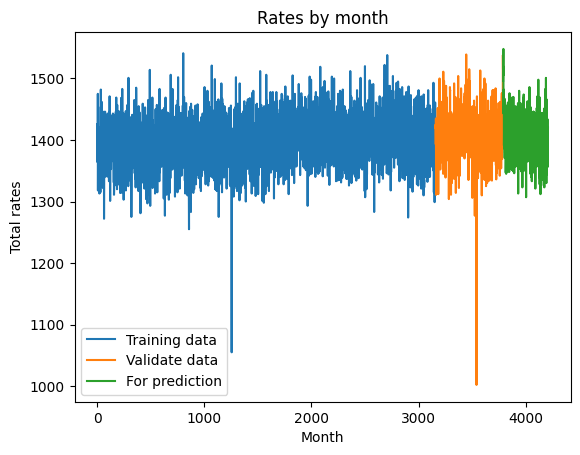

In [7]:
#AR модель, поделённая на выборки

students = pd.read_csv('data/Radioactivity_in_the_ground_at_10_minute_intervals_over_one_month.csv')
students = students[['rate']]
students.reset_index(inplace= True )
df = students.rename(columns={'index': 'n', 'rate': 'x'})
df['t'] = df.index.values
ln = len(df)

train_cutoff = int(round(ln*0.75, 0))
validate_cutoff = int(round(ln*0.90,0))

train_df = df[df['t'] <= train_cutoff]
validate_df = df[(df['t'] > train_cutoff) & (df['t'] <= validate_cutoff)]
forecast_df = df[df['t'] > validate_cutoff]

plt.plot(train_df.t, train_df.x, label='Training data')
plt.plot(validate_df.t, validate_df.x, label='Validate data')
plt.plot(forecast_df.t, forecast_df.x, label='For prediction')
plt.legend()
plt.title('Rates by month')
plt.ylabel('Total rates')
plt.xlabel('Month')
plt.show()

In [8]:
#Объект модели

from statsmodels.tsa.ar_model import AutoReg, ar_select_order
mod = AutoReg(df.t, 3, old_names=False)
res = mod.fit()

print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                      t   No. Observations:                 4209
Model:                     AutoReg(3)   Log Likelihood               83803.333
Method:               Conditional MLE   S.D. of innovations              0.000
Date:                Sat, 16 Dec 2023   AIC                        -167596.665
Time:                        12:19:07   BIC                        -167564.944
Sample:                             3   HQIC                       -167585.449
                                 4209                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6667   5.53e-12   1.21e+11      0.000       0.667       0.667
t.L1           1.0000   5.53e-12   1.81e+11      0.000       1.000       1.000
t.L2           0.3333   2.28e-15   1.46e+14      0.0

In [9]:
#Модель с оценкой HC0

res = mod.fit(cov_type="HC0")
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                      t   No. Observations:                 4209
Model:                     AutoReg(3)   Log Likelihood               83803.333
Method:               Conditional MLE   S.D. of innovations              0.000
Date:                Sat, 16 Dec 2023   AIC                        -167596.665
Time:                        12:19:07   BIC                        -167564.944
Sample:                             3   HQIC                       -167585.449
                                 4209                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6667    3.5e-12   1.91e+11      0.000       0.667       0.667
t.L1           1.0000    3.5e-12   2.86e+11      0.000       1.000       1.000
t.L2           0.3333   2.49e-15   1.34e+14      0.0

In [10]:
sel = ar_select_order(df.x, 13, old_names=False)
sel.ar_lags
res = sel.model.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                      x   No. Observations:                 4209
Model:                     AutoReg(5)   Log Likelihood              -21395.741
Method:               Conditional MLE   S.D. of innovations             39.269
Date:                Sat, 16 Dec 2023   AIC                          42805.483
Time:                        12:19:07   BIC                          42849.889
Sample:                             5   HQIC                         42821.184
                                 4209                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1018.3984     42.084     24.199      0.000     935.915    1100.881
x.L1           0.0743      0.015      4.825      0.000       0.044       0.104
x.L2           0.0446      0.015      2.896      0.0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


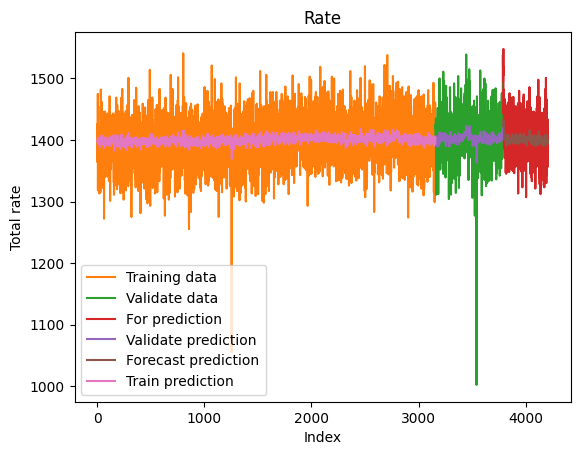

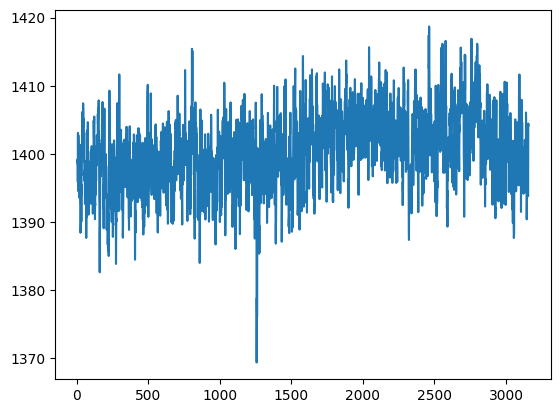

In [11]:
#Предсказание, график
fig = res.plot_predict(train_cutoff)
pred = res.predict(start=0, end=train_cutoff, dynamic=False)
v_pred = res.predict(start=train_cutoff+1, end=(validate_cutoff), dynamic=False)
f_pred = res.predict(start=validate_cutoff + 1, end=(forecast_df.t[len(df.t)-1]), dynamic=False)

plt.plot(train_df.t, train_df.x, label='Training data')
plt.plot(validate_df.t, validate_df.x, label='Validate data')
plt.plot(forecast_df.t, forecast_df.x, label='For prediction')
plt.plot(validate_df.t, v_pred, label='Validate prediction ')
plt.plot(forecast_df.t, f_pred, label='Forecast prediction')
plt.plot(train_df.t, pred, label='Train prediction')

plt.legend()
plt.title('Rate')
plt.ylabel('Total rate')
plt.xlabel('Index')
plt.show()

plt.plot(pred)

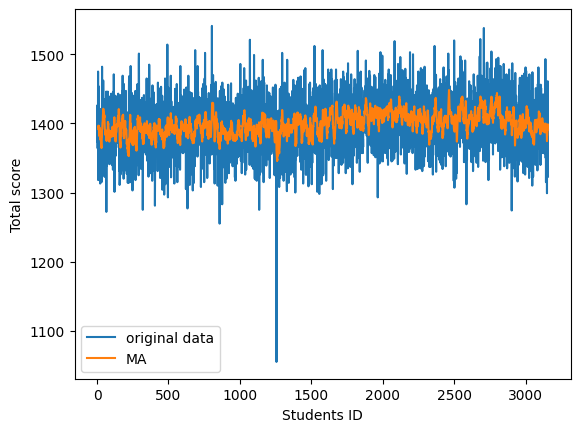

In [12]:
# MA
df['t'] = df.index.values
ln = len(df)
train_cutoff = int(round(ln*0.75, 0))
validate_cutoff = int(round(ln*0.90,0))

train_df = df[df['t'] <= train_cutoff]
validate_df = df[(df['t'] > train_cutoff) & (df['t'] <= validate_cutoff)]
forecast_df = df[df['t'] > validate_cutoff]

plt.plot(train_df["t"], train_df["x"], label="original data")
plt.plot(train_df["t"], train_df["x"].rolling(10).mean(), label="MA")
plt.legend()
plt.ylabel('Total score')
plt.xlabel('Students ID')
plt.show()

In [13]:
#Вывод, метрика
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, r2_score

print("RMSE:", np.sqrt(mean_squared_error(forecast_df.x, f_pred)))
print("MAPE:", mean_absolute_percentage_error(forecast_df.x, f_pred))
print("MAE:", mean_absolute_error(forecast_df.x, f_pred))
print("R2: ", r2_score(forecast_df.x, f_pred))

RMSE: 36.708394160187446
MAPE: 0.02094180757939741
MAE: 29.40646034402525
R2:  0.03221805091360708
